# Spatial Networks

## I/O functions

To save or read files, I have created several functions that will translate `SpatialGraph` objects into geojson data.

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spatial_networks import SpatialNode, SpatialEdge, SpatialGraph
from spatial_networks import RandomGeometricGraph
from shapely.geometry import Point, LineString

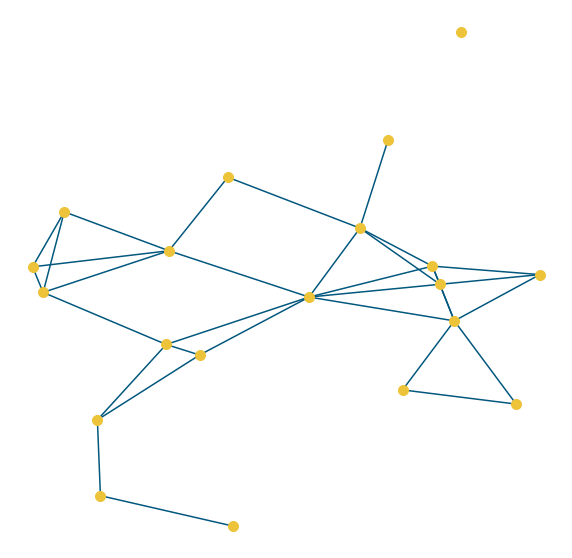

In [3]:
rng = np.random.default_rng(1234)

my_graph = RandomGeometricGraph(
    number_of_nodes=20,
    position_distribution=rng.normal,
    radius=.5
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

my_graph.draw(ax=ax)

plt.show()

We can access our nodes as `SpatialNode` and our edges as `SpatialEdge` with `_get_nodes` and `_get_edges`:

In [4]:
spatial_edges = my_graph._get_edges()
spatial_nodes = my_graph._get_nodes()

print(spatial_edges[0])
print(spatial_nodes[0])

SpatialEdge from node 'rgg_0' to node 'rgg_3'
SpatialNode 'rgg_0' with coordinates: POINT (-1.6038368053963015 0.0640999140037641)


They are several helper functions that can be used to translate these edges and nodes into data suited for geojson. 

In [5]:
from pprint import pprint
from spatial_networks.utils.graph_io import (
    convert_spatial_edge_to_geojson,
    convert_spatial_node_to_geojson
)
print("SpatialEdge to geojson")
pprint(
    convert_spatial_edge_to_geojson(spatial_edges[0])
)
print()
print("SpatialNode to geojson")
pprint(
    convert_spatial_node_to_geojson(spatial_nodes[0])
)

SpatialEdge to geojson
{'geometry': {'coordinates': ((-1.6038368053963015, 0.06409991400376411),
                              (-1.4788233606644015, 0.9454729746458599)),
              'type': 'LineString'},
 'properties': {'length': 0.8901948288938502,
                'object_type': 'SpatialEdge',
                'start': 'rgg_0',
                'stop': 'rgg_3'},
 'type': 'Feature'}

SpatialNode to geojson
{'geometry': {'coordinates': (-1.6038368053963015, 0.06409991400376411),
              'type': 'Point'},
 'properties': {'name': 'rgg_0', 'object_type': 'SpatialNode'},
 'type': 'Feature'}


Note that `SpatialNode` and `SpatialEdge` have an attribute in `properties` which is called `object_type` and which is used to store the class name. To convert the whole graph, we can use another function:

In [6]:
from spatial_networks.utils import convert_graph_to_geojson

geojson_data = convert_graph_to_geojson(my_graph)

print(geojson_data.keys())
print("type")
print(geojson_data["type"])
print("features")
pprint(geojson_data["features"][:2])
pprint(geojson_data["features"][-2:])

dict_keys(['type', 'features'])
type
FeatureCollection
features
[{'geometry': {'coordinates': (-1.6038368053963015, 0.06409991400376411),
               'type': 'Point'},
  'properties': {'name': 'rgg_0', 'object_type': 'SpatialNode'},
  'type': 'Feature'},
 {'geometry': {'coordinates': (0.7408912958767259, 0.15261919356565307),
               'type': 'Point'},
  'properties': {'name': 'rgg_1', 'object_type': 'SpatialNode'},
  'type': 'Feature'}]
[{'geometry': {'coordinates': ((1.33121421656793, 0.25883851276767456),
                               (0.8259925843791154, -0.2472150147600114)),
               'type': 'LineString'},
  'properties': {'length': 0.7150797650295695,
                 'object_type': 'SpatialEdge',
                 'start': 'rgg_15',
                 'stop': 'rgg_19'},
  'type': 'Feature'},
 {'geometry': {'coordinates': ((-0.8765637740699862, -0.5055091274868608),
                               (-1.28312916995062, -1.3303284249793816)),
               'type': 'Lin

We simply can write our data to a json file by using `json.dump` for example. Another way to do this is to use the `write_spatial_graph_to_geojson_file` (not the most original name).

In [7]:
from spatial_networks.utils import write_spatial_graph_to_geojson_file

write_spatial_graph_to_geojson_file(graph=my_graph, filename="my_graph.json")

Of course we can reed the content of this file. Here the `object_type` attribute that we have see a bit earlier is very important to distinguish edges and nodes.

In [8]:
from spatial_networks.utils import read_spatial_graph_from_geojson_file

my_second_graph = read_spatial_graph_from_geojson_file(filename="my_graph.json")

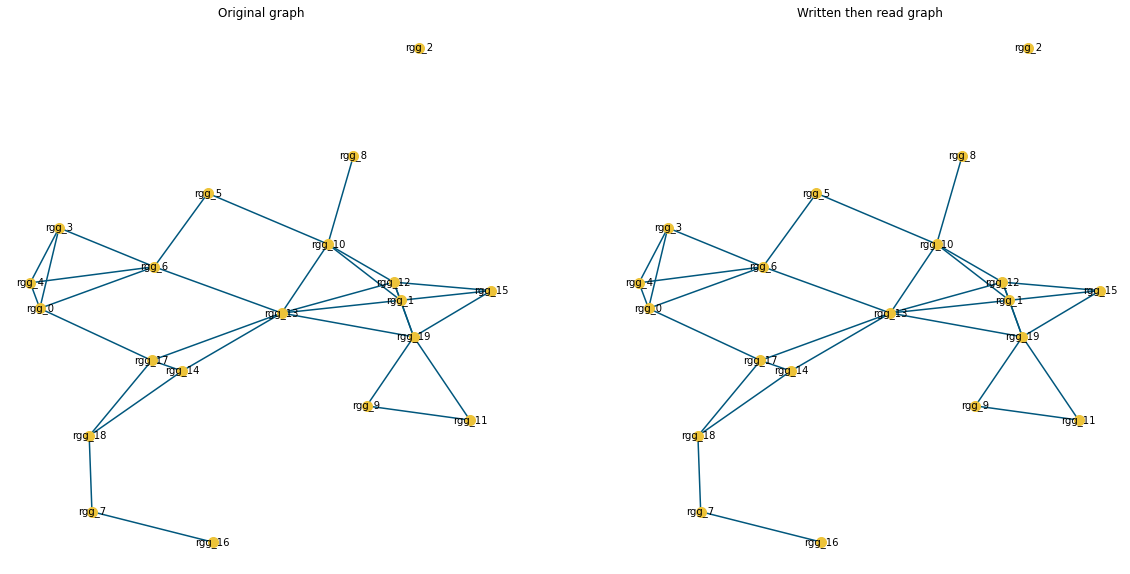

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20 , 10))

my_graph.draw(ax=axes[0], include_names=True)
my_second_graph.draw(ax=axes[1], include_names=True)

axes[0].set_title("Original graph")
axes[1].set_title("Written then read graph")

plt.show()

## Loaders

As in other libraries, I wanted to include some examples of pre-defined graphs that are based on real data.

## Paris subway

This one is from an old dataset that I used to represent the Paris Subway (it is not up to date unfortunately)...

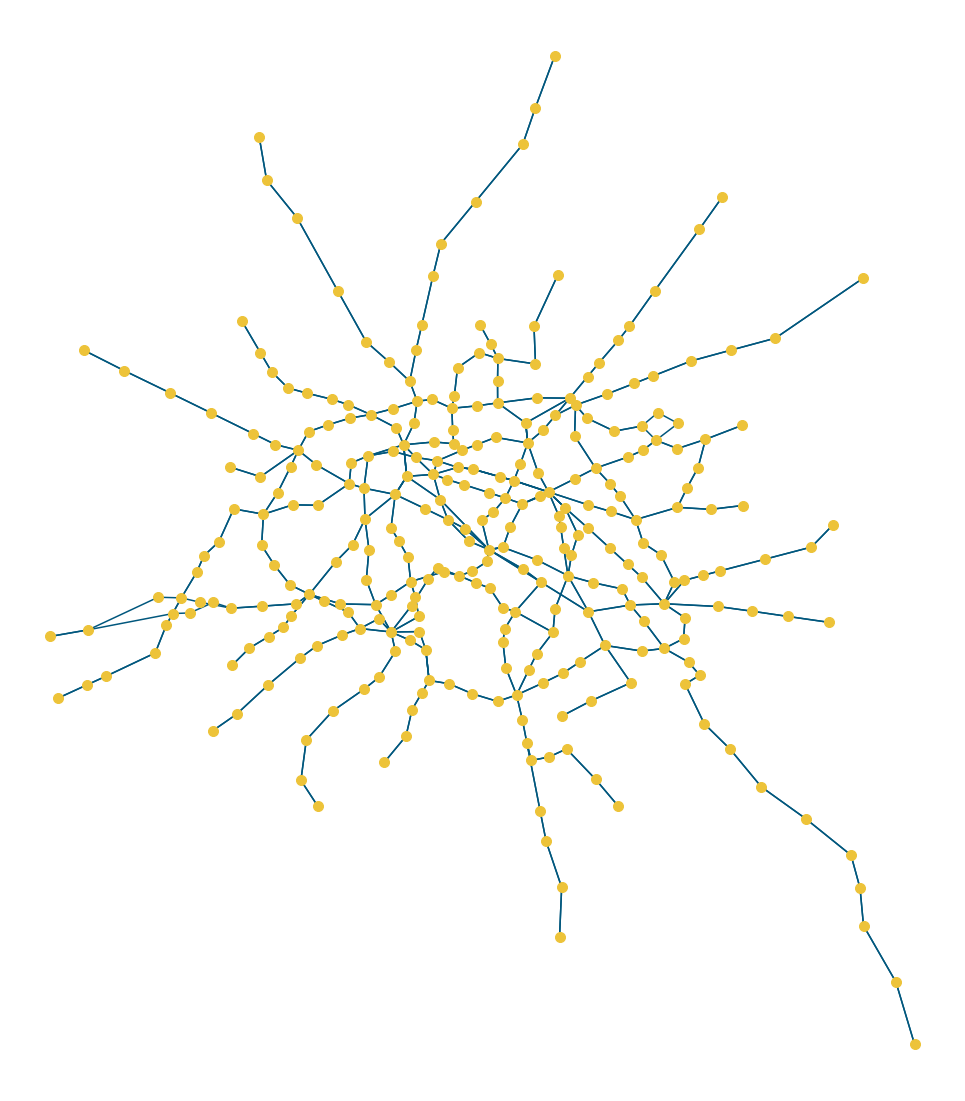

In [10]:
from spatial_networks.utils import load_paris_subway

my_paris_subway = load_paris_subway()

fig, ax = plt.subplots(1, 1, figsize=(20, 20))

my_paris_subway.draw(ax=ax, aspect_ratio=1.)

plt.show()

I'll add other datasets (and surely update this one !)